In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt  
import pandas as pd

#imputer to handle missing data 
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#o check accuracy
from sklearn.metrics import accuracy_score
# to check accuracy
from sklearn.metrics import *

import pickle 

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

import csv

In [2]:
# load dataset
test_dataset = pd.read_csv ("CSV_files/test_file.csv")
print("Dataset has {} rows and {} Columns".format(test_dataset.shape[0],test_dataset.shape[1])) 

Dataset has 2 rows and 2 Columns



Accuracy train by acc_r2 96.92083366608915


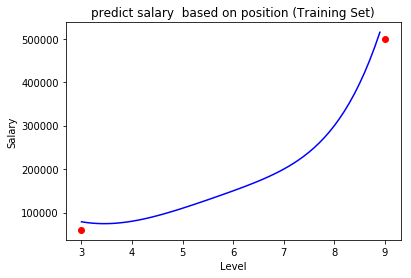

In [6]:
class Testing():
    
    def y_prediction(self,x_test,lin_reg2,poly_reg):
        # predicting the train set result
        y_pred_train = lin_reg2.predict(poly_reg.fit_transform(x_test))
        return y_pred_train
        
#         # predicting the test set result
#         return regression.predict(x_train)
    
    def accuracy(self,y_predict_train,y_train):
        # acc using r2
        acc_r2 = r2_score(y_train, y_predict_train)*100      
#         acc_r2 = (1-error)*100
        
        # using median_ab_error
        median_ab_error = median_absolute_error(y_train, y_predict_train)
        return acc_r2, median_ab_error
    
    def visualization(self,x_test,y_test,poly_reg, lin_reg2):
        # Visualization the Decision Tree result (for higher resolution & smoother curve)
        x_grid=np.arange(min(x_test),max(x_test),0.1)
        x_grid=x_grid.reshape((len(x_grid),1))
        
        plt.scatter(x_test,y_test,color='red')
        plt.plot(x_grid,lin_reg2.predict(poly_reg.fit_transform(x_grid)),color='blue')
        plt.title('predict salary  based on position (Training Set)')
        plt.xlabel('Level')
        plt.ylabel('Salary')
        plt.show()
        

def main():
    #class obj created
    obj  = Testing()
    
    # seperate fetures and label
    x_test = test_dataset.iloc[:,:-1].values
    y_test = test_dataset.iloc[:,1].values
 
    #cross validation
    file1 = open('Polynomial_RegModule.pkl', 'rb')
    poly_reg = pickle.load(file1)
    lin_reg2 = pickle.load(file1)
    
    # y_prediction ( cross validation)   
    y_test_pre = obj.y_prediction(x_test,lin_reg2,poly_reg)
#     print("\n\n y_prediction:",y_test_pre)
    
    acc_r2, median_ab_error = obj.accuracy(y_test_pre,y_test)
    print("\nAccuracy train by acc_r2", acc_r2)
#     print("\nAccuracy train by mean_sq_log", median_ab_error)

    obj.visualization(x_test,y_test,poly_reg, lin_reg2)

if __name__ == '__main__':
    main()
